<a href="https://colab.research.google.com/github/Zzzhenya/Your-New-Data-Team/blob/main/Shenya_Recruitment_Analysis_StackOverflow_Survey_Analysis_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# “How to recruit Data Scientists?” - Recruitment Analysis 

## **Description:**

You are working for a major tech company in Berlin as a Junior Data Analyst. The tech company wants to grow and hire for their new Data Science team. The HR department of the company asks you to create an analysis on how to recruit for the new data science team. 

You take the Stackoverflow Survey to analyze the data science market. 

The company wants to recruit people who have Python and SQL skills. 

**Please answer the following questions:**
- How many Data Analyst / Scientists are in the survey? 
- What profile do these Data Analyst / Scientist have? (Background, education, work experience)
- What is the salary range for such Data Analysts / Scientists?
- Please share any other insight you find that would be relevant for deciding how to recruit Data Analysts/Scientist.

## Resources:

* [About the Survey ](https://insights.stackoverflow.com/survey)



In [73]:
import requests, zipfile, io
import pandas as pd

In [74]:
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline
pd.set_option('display.max_colwidth', None)

In [75]:
import seaborn as sns

In [76]:
# Link to Survey Data
zip_file_url = "https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip"

In [77]:
# Download Survey Data into Google Colab
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/content")

In [78]:
# Load Survey Data
survey_results = pd.read_csv("/content/survey_results_public.csv")

In [79]:
survey_results.describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,73268.000000,3.842200e+04,0.0,0.0,36769.000000,3.807100e+04
mean,36634.500000,2.342434e+52,NaN,NaN,10.242378,1.707613e+05
std,21150.794099,4.591478e+54,NaN,NaN,8.706850,7.814132e+05
min,1.000000,0.000000e+00,NaN,NaN,0.000000,1.000000e+00
25%,18317.750000,3.000000e+04,NaN,NaN,4.000000,3.583200e+04
50%,36634.500000,7.750000e+04,NaN,NaN,8.000000,6.784500e+04
75%,54951.250000,1.540000e+05,NaN,NaN,15.000000,1.200000e+05
max,73268.000000,9.000000e+56,NaN,NaN,50.000000,5.000000e+07


# Data Exploration

## Seperating columns into sections based on the questionnaire.

### Basic Information 

1. 'ResponseId', : Identity of the saved survey response

2. 'MainBranch', : Whether developer,hobby developer, student, or not; one option: Reguired

3. 'Employment', : Which of the following best describes your current employment status?

4. 'RemoteWork', : Which best describes your current work situation?

5. 'CodingActivities', : Which of the following best describes the code you write outside of work? Select all that apply.



### Education, Work, and Career

6. 'EdLevel', : Which of the following best describes the highest level of formal education that you’ve completed? *

7. 'LearnCode', : How did you learn to code? Select all that apply.

8. 'LearnCodeOnline', : What online resources do you use to learn to code? Select all that apply.

9. 'LearnCodeCoursesCert', : What online courses or certifications do you use to learn to code? Select all that apply.

10. 'YearsCode', : Including any education, how many years have you been coding in total?

11. 'YearsCodePro', : NOT including education, how many years have you coded professionally (as a part of your work)?

12. **'DevType',** : Which of the following describes your current job? Please select all that apply.

13. 'OrgSize', : Approximately how many people are employed by the company or organization you currently work for?

14. 'PurchaseInfluence', : What level of influence do you, personally, have over new technology purchases at your organization?

15. 'BuyNewTool', : When buying a new tool or software, how do you discover and research available solutions? Select all that apply.

16. **'Country', ** : Where do you live? *

17. 'Currency', : Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in. *

18. 'CompTotal', : What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)?

19. 'CompFreq', : Is that compensation weekly, monthly, or yearly?



### Technology and Tech Culture


20. **'LanguageHaveWorkedWith',** : Which programming, scripting, and markup languages have you done extensive development work in over the past year

21. **'LanguageWantToWorkWith', ** : Which programming, scripting, and markup languages do you want to work in over the next year? 

22. **'DatabaseHaveWorkedWith',** : Which database environments have you done extensive development work in over the past year

23. **'DatabaseWantToWorkWith', ** : Which database environments do you want to work in over the next year? 


24. 'PlatformHaveWorkedWith', : Which cloud platforms now

25. 'PlatformWantToWorkWith',  : Which cloud platforms next

26. 'WebframeHaveWorkedWith', : Which web frameworks and web technologies

27. 'WebframeWantToWorkWith', : Which web frameworks and web technologies

28. **'MiscTechHaveWorkedWith', : Which other frameworks and libraries**

29. **'MiscTechWantToWorkWith', : Which other frameworks and libraries**

30. 'ToolsTechHaveWorkedWith', : Which developer tools

31. 'ToolsTechWantToWorkWith', : Which developer tools

32. 'NEWCollabToolsHaveWorkedWith', : Which development environments 

33. 'NEWCollabToolsWantToWorkWith', : Which development environments 



34. 'OpSysProfessional use', : What is the primary operating system Professional use

35. 'OpSysPersonal use', : What is the primary operating system Personal User

36. 'VersionControlSystem', : What are the primary version control systems you use? Select all that apply.

37. 'VCInteraction',: How do you interact with your version control system? Select all that apply.

38. 'VCHostingPersonal use', : 
What version control hosting service are you using? Personal

39. 'VCHostingProfessional use', : 
What version control hosting service are you using? Professional



40. 'OfficeStackAsyncHaveWorkedWith', : Which collaborative work management tools now

41. 'OfficeStackAsyncWantToWorkWith', : Which collaborative work management tools next

42. 'OfficeStackSyncHaveWorkedWith', : Which communication tools did you use now

43. 'OfficeStackSyncWantToWorkWith', : Which communication tools did you use next


44. 'Blockchain', : How favorable are you about blockchain, crypto, and decentralization?



### Stack Community

45. 'NEWSOSites', : 
Which of the following Stack Overflow sites have you visited? Select all that apply.

46. 'SOVisitFreq', : How frequently would you say you visit Stack Overflow?

47. 'SOAccount', : Do you have a Stack Overflow account?

48. 'SOPartFreq', : How frequently would you say you participate in Q&A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.

49. 'SOComm', : Do you consider yourself a member of the Stack Overflow community?



### Demographics

50. 'Age', : Age range

51. 'Gender', : Which of the following describe you, if any? Please check all that apply.

52. 'Trans', : Do you identify as transgender?

53. 'Sexuality', : Which of the following describe you, if any? Please check all that apply.

54. 'Ethnicity', : Which of the following describe you, if any? Please check all that apply.

55. 'Accessibility', : Which of the following describe you, if any? Please check all that apply.

56. 'MentalHealth', : Which of the following describe you, if any? Please check all that apply.



### TeamsBranch
Professional Developer Series : This is an optional section

57. 'TBranch', : Would you like to participate in the Professional Developer Series?

## TeamsQuestions

58. 'ICorPM', : Are you an independent contributor or people manager?

59. **'WorkExp',**: How many years of working experience do you have?

60. 'Knowledge_1',  : I have interactions with people outside of my immediate team.

61. 'Knowledge_2', : Knowledge silos prevent me from getting ideas across the organization (i.e., one individual or team has information that isn't shared with others)

62. 'Knowledge_3', : I can find up-to-date information within my organization to help me do my job.

63. 'Knowledge_4', : I am able to quickly find answers to my questions with existing tools and resources.

64. 'Knowledge_5', : I know which system or resource to use to find information and answers to questions I have.

65. 'Knowledge_6', : I often find myself answering questions that I’ve already answered before.

66. 'Knowledge_7', : Waiting on answers to questions often causes interruptions and disrupts my workflow.



67. 'Frequency_1', : Needing help from people outside of your immediate team?

68. 'Frequency_2', : Interacting with people outside of your immediate team?

69. 'Frequency_3', : Encountering knowledge silos (where one individual or team has information that's not shared or distributed with other individuals or teams) at work?


70. 'TimeSearching', : On an average day, how much time do you typically spend searching for answers or solutions to problems you encounter at work? (This includes time spent searching on your own, asking a colleague, and waiting for a response).

71. 'TimeAnswering', : On an average day, how much time do you typically spend answering questions you get asked at work?

72. 'Onboarding', : The time it takes to onboard new hires at my company is:

73. 'ProfessionalTech', : My company has:

Missing Q: Does your team use Stack Overflow for Teams?

74. 'TrueFalse_1', : Are you involved in supporting new hires during their onboarding?

75. 'TrueFalse_2', : Do you use learning resources provided by your employer?

76. 'TrueFalse_3', : Does your employer give you time to learn new skills?


### FinalThoughtsSurveyReview

77. 'SurveyLength', : How do you feel about the length of the survey this year?

78. 'SurveyEase', : How easy or difficult was this survey to complete?

79. 'ConvertedCompYearly': Companastions converted to annual rates. Need to check whether currency was cnverted to EUR as well

In [80]:
#making a copy, just in case
df = survey_results.copy()

In [81]:
#Removing teams section because it's an optional part of survey and too many null values
df.loc[df['TBranch']=='Yes'].describe(include = 'all') # 	37200
df.loc[:,'TBranch':'ProfessionalTech'].describe(include = 'all') # 15470
#survey final thoughts
df_finalThoughts = df.loc[:,'SurveyLength':]
df_finalThoughts
#first part of survey
df_first_part = df.loc[:,'ResponseId':'TBranch']
df_first_part

#concatanate the first and final parts without teams section

df_modified = pd.concat([df_first_part,df_finalThoughts], axis = 1)
df_modified.head(2)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Too long,Difficult,NaN


# Languages : Filtering data by SQL and Python

In [82]:
#To filter those who know python, create a new column with python true/false
#All language combinations with python
df_modified["Python"] = df_modified["LanguageHaveWorkedWith"].str.contains('Python')
df_modified.loc[(df_modified.Python == True)].LanguageHaveWorkedWith.value_counts() 

Python                                                                               962
HTML/CSS;JavaScript;Python                                                           482
Python;SQL                                                                           395
HTML/CSS;JavaScript;Python;TypeScript                                                269
HTML/CSS;JavaScript;Python;SQL                                                       267
                                                                                    ... 
C#;Go;Java;JavaScript;Python;SQL                                                       1
C;C++;Java;Julia;Python;SQL;VBA                                                        1
Bash/Shell;HTML/CSS;Java;JavaScript;Kotlin;PowerShell;Python;SQL;Swift;TypeScript      1
C++;COBOL;Delphi;Python                                                                1
Bash/Shell;Dart;JavaScript;PHP;Python;SQL;TypeScript                                   1
Name: LanguageHaveWor

In [83]:
#To filter those who know SQL, create a new column with SQL true/false
#All language combinations with SQL
df_modified["SQL"] = df_modified["LanguageHaveWorkedWith"].str.contains('SQL')
df_modified.loc[(df_modified.SQL == True)].LanguageHaveWorkedWith.value_counts() 

HTML/CSS;JavaScript;PHP;SQL                                                    745
C#;HTML/CSS;JavaScript;SQL;TypeScript                                          570
C#;HTML/CSS;JavaScript;SQL                                                     520
Python;SQL                                                                     395
C#;SQL                                                                         338
                                                                              ... 
Elixir;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript                            1
Bash/Shell;C;Crystal;Go;HTML/CSS;Java;JavaScript;Python;Rust;SQL;TypeScript      1
C;Kotlin;Python;SQL                                                              1
Elixir;Go;HTML/CSS;JavaScript;Ruby;SQL;Swift;TypeScript                          1
C#;JavaScript;Lua;PowerShell;SQL;TypeScript                                      1
Name: LanguageHaveWorkedWith, Length: 14273, dtype: int64

In [84]:
#both languages
df_modified["SQLandPython"] = (df_modified.SQL == True) & (df_modified.Python == True)
df_modified.SQLandPython.value_counts()

False    55250
True     18018
Name: SQLandPython, dtype: int64

# Question 1 : Data Role Counts

**How many Data Analyst / Scientists are in the survey? **

* Count the number of 'ResponseId' where DevType = Data Analyst or Data Scientist 

'Data scientist or machine learning specialist'
'Data or business analyst'
'Scientist'
`'Engineer, data'`

## Single Option Counts

In [85]:
#DataFrame.isin(values) : Data Science
data_science = ['Data scientist or machine learning specialist']
df_modified['DataScience'] = df_modified['DevType'].isin(data_science)

df_modified['DataScience'].sum()

#df.groupby(df['DevType'])[["DataScience","DataAnalyst"]].count()
#df1.groupby(0)[["MainBranch"]].count()

498

In [86]:
#DataFrame.isin(values) : Data Analyst
data_analyst = ['Data or business analyst']
df_modified['DataAnalyst'] = df_modified['DevType'].isin(data_analyst)
df_modified['DataAnalyst'].sum()

244

In [87]:
#DataFrame.isin(values) : Data Analyst
data_engineer = ['Engineer, data']
df_modified['DataEngineer'] = df_modified['DevType'].isin(data_engineer)
df_modified['DataEngineer'].sum()

334

# Analysis

'EdLevel', : Which of the following best describes the highest level of formal education that you’ve completed? *

'LearnCode', : How did you learn to code? Select all that apply.

'LearnCodeOnline', : What online resources do you use to learn to code? Select all that apply.

'LearnCodeCoursesCert', : What online courses or certifications do you use to learn to code? Select all that apply.

'YearsCode', : Including any education, how many years have you been coding in total?

'YearsCodePro', : NOT including education, how many years have you coded professionally (as a part of your work)?

'DevType', : Which of the following describes your current job? Please select all that apply.

'OrgSize', : Approximately how many people are employed by the company or organization you currently work for?

'PurchaseInfluence', : What level of influence do you, personally, have over new technology purchases at your organization?

'BuyNewTool', : When buying a new tool or software, how do you discover and research available solutions? Select all that apply.

*'Country', * : Where do you live? *

'ConvertedCompYearly'


```
cars.groupby("Make").agg(
    {"Price" : ["min", "max"],
     "Doors" : ["mean", "nunique"],
     "Kms" : "nunique"
    }
)

--
my_functions = ["mean", "count"]
my_columns = ["Price", "Doors"]

price_by_kind = cars.groupby("Kind")[my_columns].agg(my_functions)
price_by_kind

```



## Main Data Role Masks

In [88]:
#language_mask = (df_modified['SQL'] == True) & (df_modified['Python'] == True)
#dataAnalyst_mask = df_modified.loc[(df_modified['DataAnalyst'] == True) & (language_mask)]
#dataScience_mask = df_modified.loc[(df_modified['DataScience'] == True) & (language_mask)]
#dataEngineer_mask = df_modified.loc[(df_modified['DataEngineer'] == True) &(language_mask)]

#Removing the language mask
dataAnalyst_mask = df_modified.loc[(df_modified['DataAnalyst'] == True)]
dataScience_mask = df_modified.loc[(df_modified['DataScience'] == True)]
dataEngineer_mask = df_modified.loc[(df_modified['DataEngineer'] == True)]

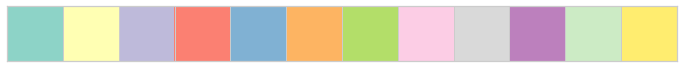

In [89]:
# Setting up colour palette
palette_1 = sns.color_palette("Set3",12)
sns.palplot(palette_1)

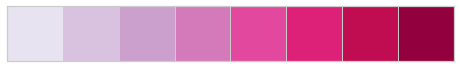

In [90]:
# Setting up colour palette
palette_2 = sns.color_palette("PuRd",8)
sns.palplot(palette_2)

# Formal Education

## Raw Numbers

In [91]:
dataAnalyst_mask.DevType.value_counts()

Data or business analyst    244
Name: DevType, dtype: int64

In [92]:
#datascience education

education_cols = ["EdLevel","LearnCode", "LearnCodeOnline", "LearnCodeCoursesCert"]
work_experience = ["YearsCode","YearsCodePro"]

dataScience_edu = dataScience_mask.groupby(["EdLevel"])["EdLevel"].agg(["count"]).sort_values(by=["count"], ascending=False)
dataScience_edu.reset_index(inplace = True)
dataScience_edu
#sns.barplot(data = dataScience_edu, y="EdLevel", x="count")

,EdLevel,count
0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",248
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",132
2,"Other doctoral degree (Ph.D., Ed.D., etc.)",88
3,Some college/university study without earning a degree,10
4,"Professional degree (JD, MD, etc.)",9
5,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",7
6,Something else,2
7,"Associate degree (A.A., A.S., etc.)",1
8,Primary/elementary school,1


In [93]:
#DataAnalytics education

dataAnalyst_edu = dataAnalyst_mask.groupby(["EdLevel"])["EdLevel"].agg(["count"]).sort_values(by=["count"], ascending=False)
dataAnalyst_edu.reset_index(inplace = True)
dataAnalyst_edu
#sns.barplot(data = dataAnalyst_edu, y="EdLevel", x="count")

,EdLevel,count
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",119
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",84
2,Some college/university study without earning a degree,19
3,"Other doctoral degree (Ph.D., Ed.D., etc.)",8
4,"Associate degree (A.A., A.S., etc.)",6
5,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",4
6,"Professional degree (JD, MD, etc.)",2
7,Something else,2


In [94]:
#DataEngineering education

dataEngineer_edu = dataEngineer_mask.groupby(["EdLevel"])["EdLevel"].agg(["count"]).sort_values(by=["count"], ascending=False)
dataEngineer_edu.reset_index(inplace = True)
dataEngineer_edu
#sns.barplot(data = dataEngineer_edu, y="EdLevel", x="count")

,EdLevel,count
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",142
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",128
2,Some college/university study without earning a degree,25
3,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",16
4,"Other doctoral degree (Ph.D., Ed.D., etc.)",10
5,"Associate degree (A.A., A.S., etc.)",6
6,"Professional degree (JD, MD, etc.)",5
7,Something else,2


In [95]:
edu_order = [
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
    'Some college/university study without earning a degree',
    'Associate degree (A.A., A.S., etc.)',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
    'Professional degree (JD, MD, etc.)',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
    'Other doctoral degree (Ph.D., Ed.D., etc.)',
    'Something else']

Text(0.5, 0.98, '\n\n\nEducation Level of Data Scientists, Data Analysts and Data Engineers from the survey.')

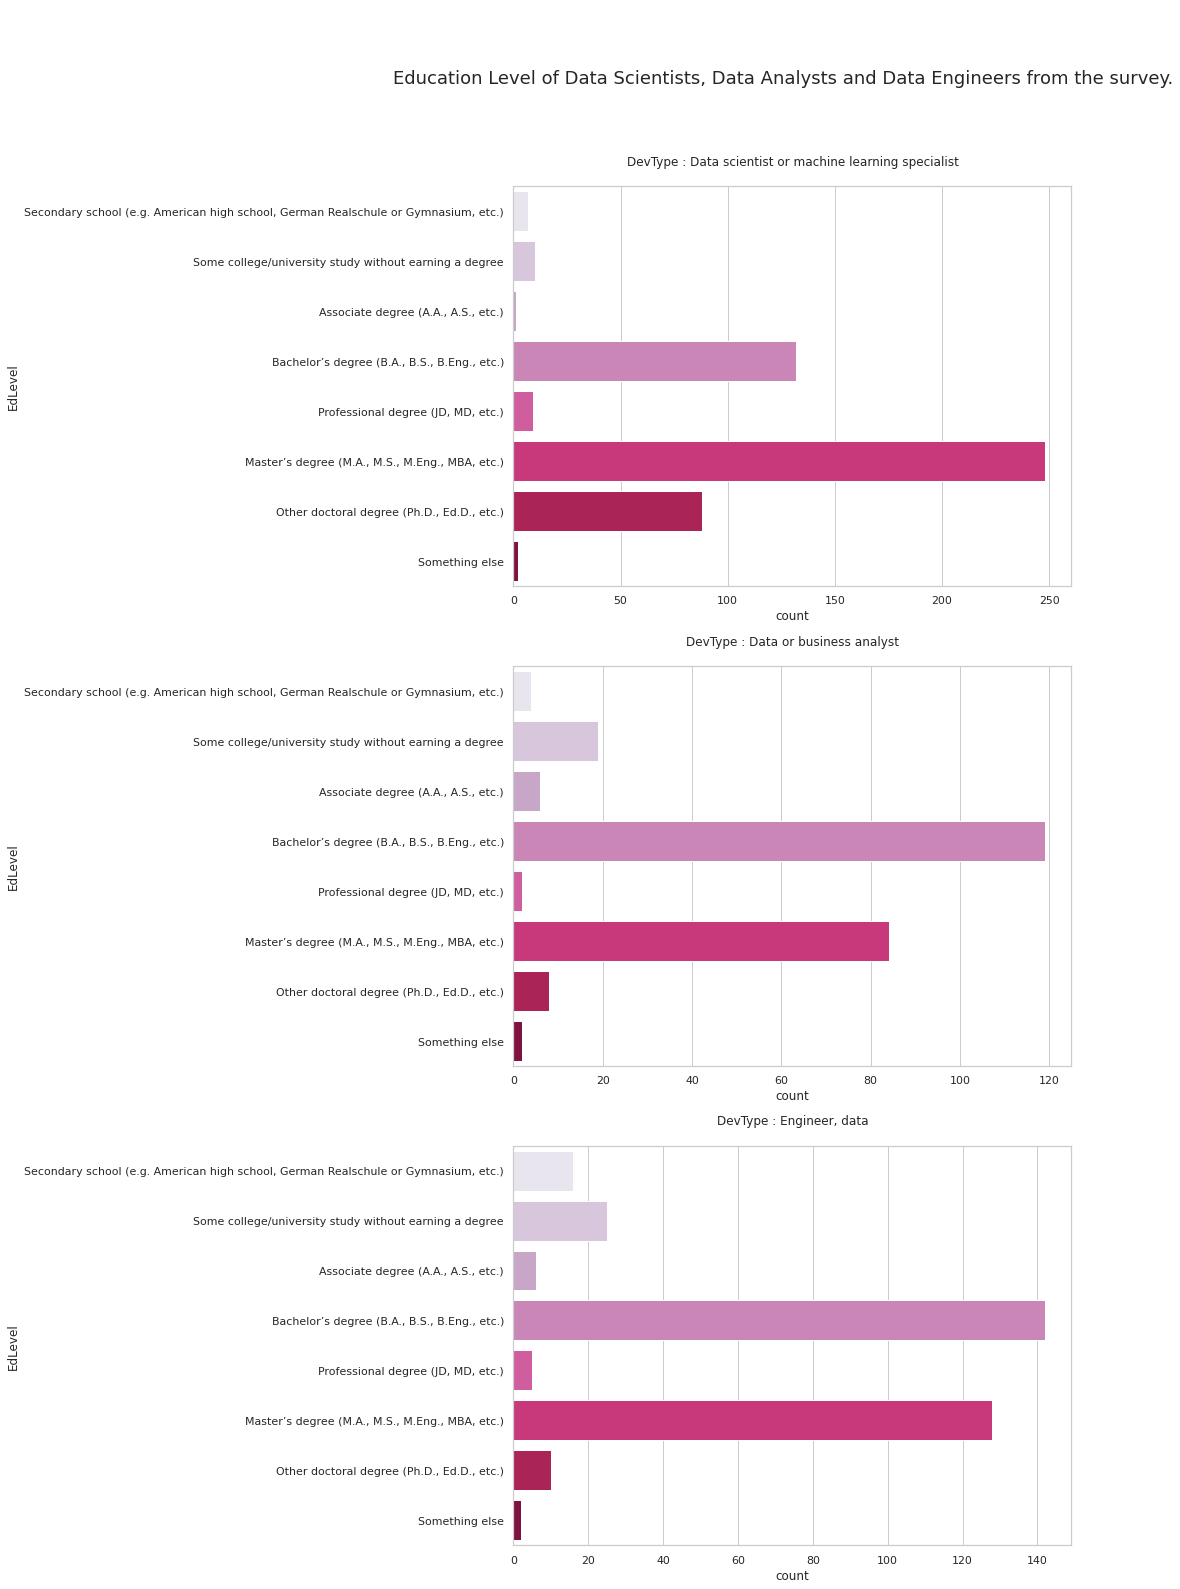

In [96]:
fig = plt.figure(figsize=(10, 25))
spec = fig.add_gridspec(ncols=1, nrows=3)
sns.set(style="whitegrid")
ax0 = fig.add_subplot(spec[0, 0])
ax0.set_title('DevType : Data scientist or machine learning specialist\n')
sns.barplot(data = dataScience_edu, y="EdLevel", x="count", order = edu_order, palette = palette_2, ax = ax0)

ax1 = fig.add_subplot(spec[1, 0])
ax1.set_title('DevType : Data or business analyst\n')
sns.barplot(data = dataAnalyst_edu, y="EdLevel", x="count",order = edu_order,palette = palette_2, ax = ax1)

ax2 = fig.add_subplot(spec[2, 0])
ax2.set_title('DevType : Engineer, data\n')
sns.barplot(data = dataEngineer_edu, y="EdLevel", x="count",order = edu_order,palette = palette_2, ax = ax2)

fig.suptitle('\n\n\nEducation Level of Data Scientists, Data Analysts and Data Engineers from the survey.', fontsize = 18)

## Percentages

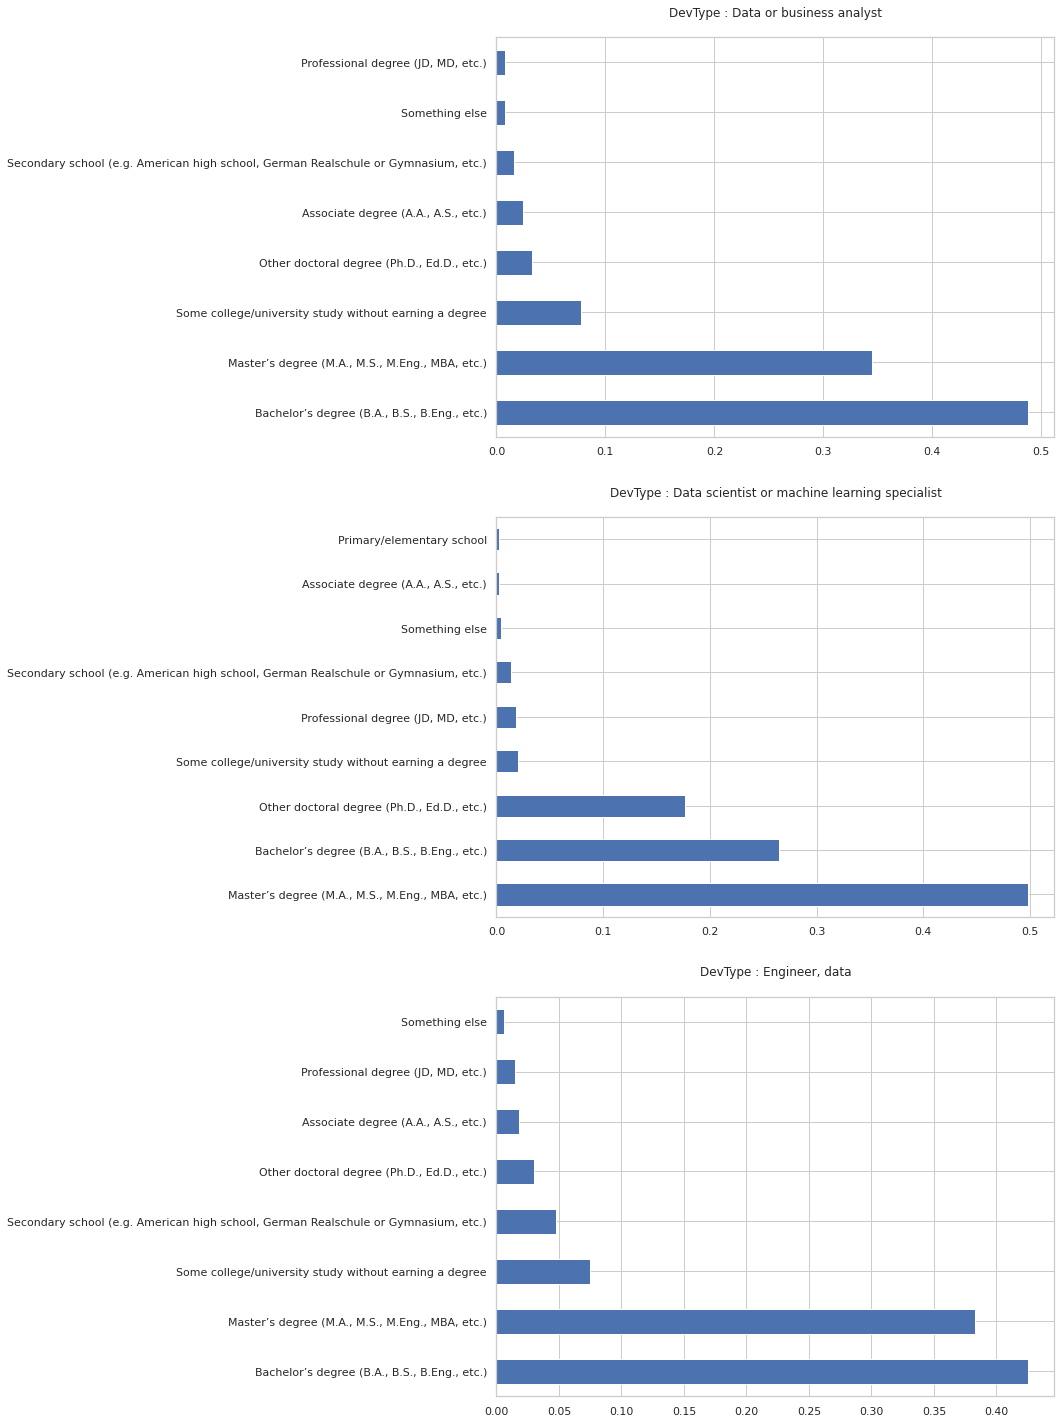

In [97]:
fig = plt.figure(figsize=(10, 25))
spec = fig.add_gridspec(ncols=1, nrows=3)
sns.set(style="whitegrid")
ax0 = fig.add_subplot(spec[0, 0])
ax0.set_title('DevType : Data or business analyst\n')
dataAnalyst_mask.EdLevel.value_counts(normalize=True).plot(kind='barh', ax = ax0)
ax1 = fig.add_subplot(spec[1, 0])
ax1.set_title('DevType : Data scientist or machine learning specialist\n')
dataScience_mask.EdLevel.value_counts(normalize=True).plot(kind='barh', ax = ax1)
ax2 = fig.add_subplot(spec[2, 0])
ax2.set_title('DevType : Engineer, data\n')
dataEngineer_mask.EdLevel.value_counts(normalize=True).plot(kind='barh', ax = ax2)



# **YearsCode and YearsCodePro as experience**

In [98]:
df_modified['YearsCode'].unique()

array([nan, '14', '20', '8', '15', '3', '1', '6', '37', '5', '12', '22',
       '11', '4', '7', '13', '36', '2', '25', '10', '40', '16', '27',
       '24', '19', '9', '17', '18', '26', 'More than 50 years', '29',
       '30', '32', 'Less than 1 year', '48', '45', '38', '39', '28', '23',
       '43', '21', '41', '35', '50', '33', '31', '34', '46', '44', '42',
       '47', '49'], dtype=object)

In [99]:
#yearsCode_order = list['Less than 1 year']

#[str(x) for x in a]
yearsCode_order= [str(x) for x in list(range(1,51))]
#fruits.insert(1, "orange")
yearsCode_order.insert(0,'Less than 1 year')
yearsCode_order.append('More than 50 years')


In [100]:
df_modified['YearsCodePro'].unique()

array([nan, '5', '17', '3', '6', '30', '2', '10', '15', '4', '22', '20',
       '40', '9', '14', '21', '7', '18', '25', '8', '12', '45', '1', '19',
       '28', '24', '11', '23', 'Less than 1 year', '32', '27', '16', '44',
       '26', '37', '46', '13', '31', '39', '34', '38', '35', '29', '42',
       '36', '33', '43', '41', '48', '50', 'More than 50 years', '47',
       '49'], dtype=object)

In [101]:
#yearsCode_order= [str(x) for x in list(range(1,51))]
yearsCodePro_order= [str(x) for x in list(range(1,51))]
yearsCodePro_order.insert(0,'Less than 1 year')
yearsCodePro_order.append('More than 50 years')

In [102]:
data_mask = df_modified.loc[(df_modified['DataAnalyst'] == True)|(df_modified['DataScience'] == True)|(df_modified['DataEngineer'] == True)]
data_mask
data_exp = data_mask.groupby(["DevType","YearsCode","YearsCodePro"])[["EdLevel"]].agg("count")
data_exp.rename(columns={"EdLevel": "Count"}, inplace = True)
data_exp.reset_index(inplace = True)
data_exp.head(2)

,DevType,YearsCode,YearsCodePro,Count
0,Data or business analyst,1,1,1
1,Data or business analyst,1,4,1


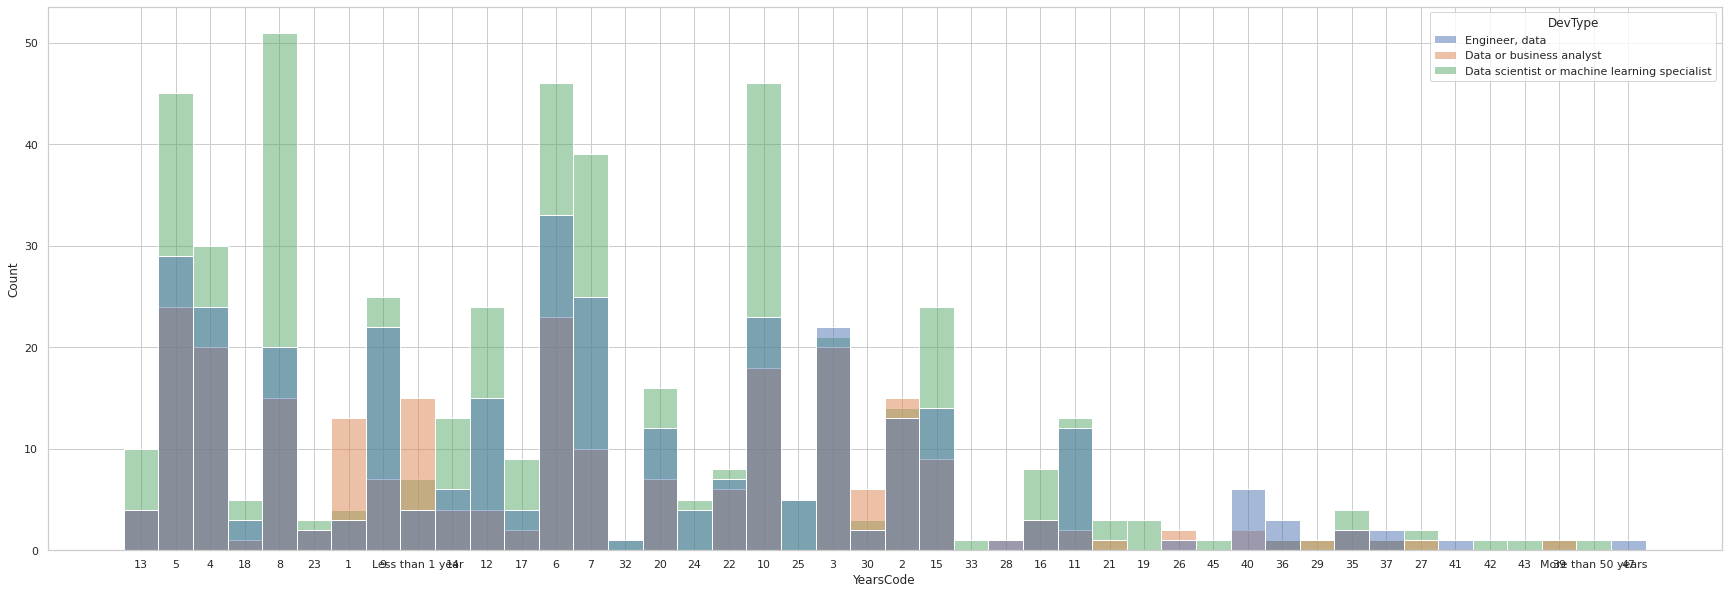

In [103]:
fig = plt.figure(figsize=(30, 10))
spec = fig.add_gridspec(ncols=1, nrows=1)
ax0 = fig.add_subplot(spec[0, 0])
sns.histplot(data = data_mask, x = "YearsCode" , hue = "DevType", ax = ax0)

#Strings are not ordered

Text(0.5, 0.98, '\n\n\nCoding Experience of Data Scientists, Data Analysts and Data Engineers from the survey.')

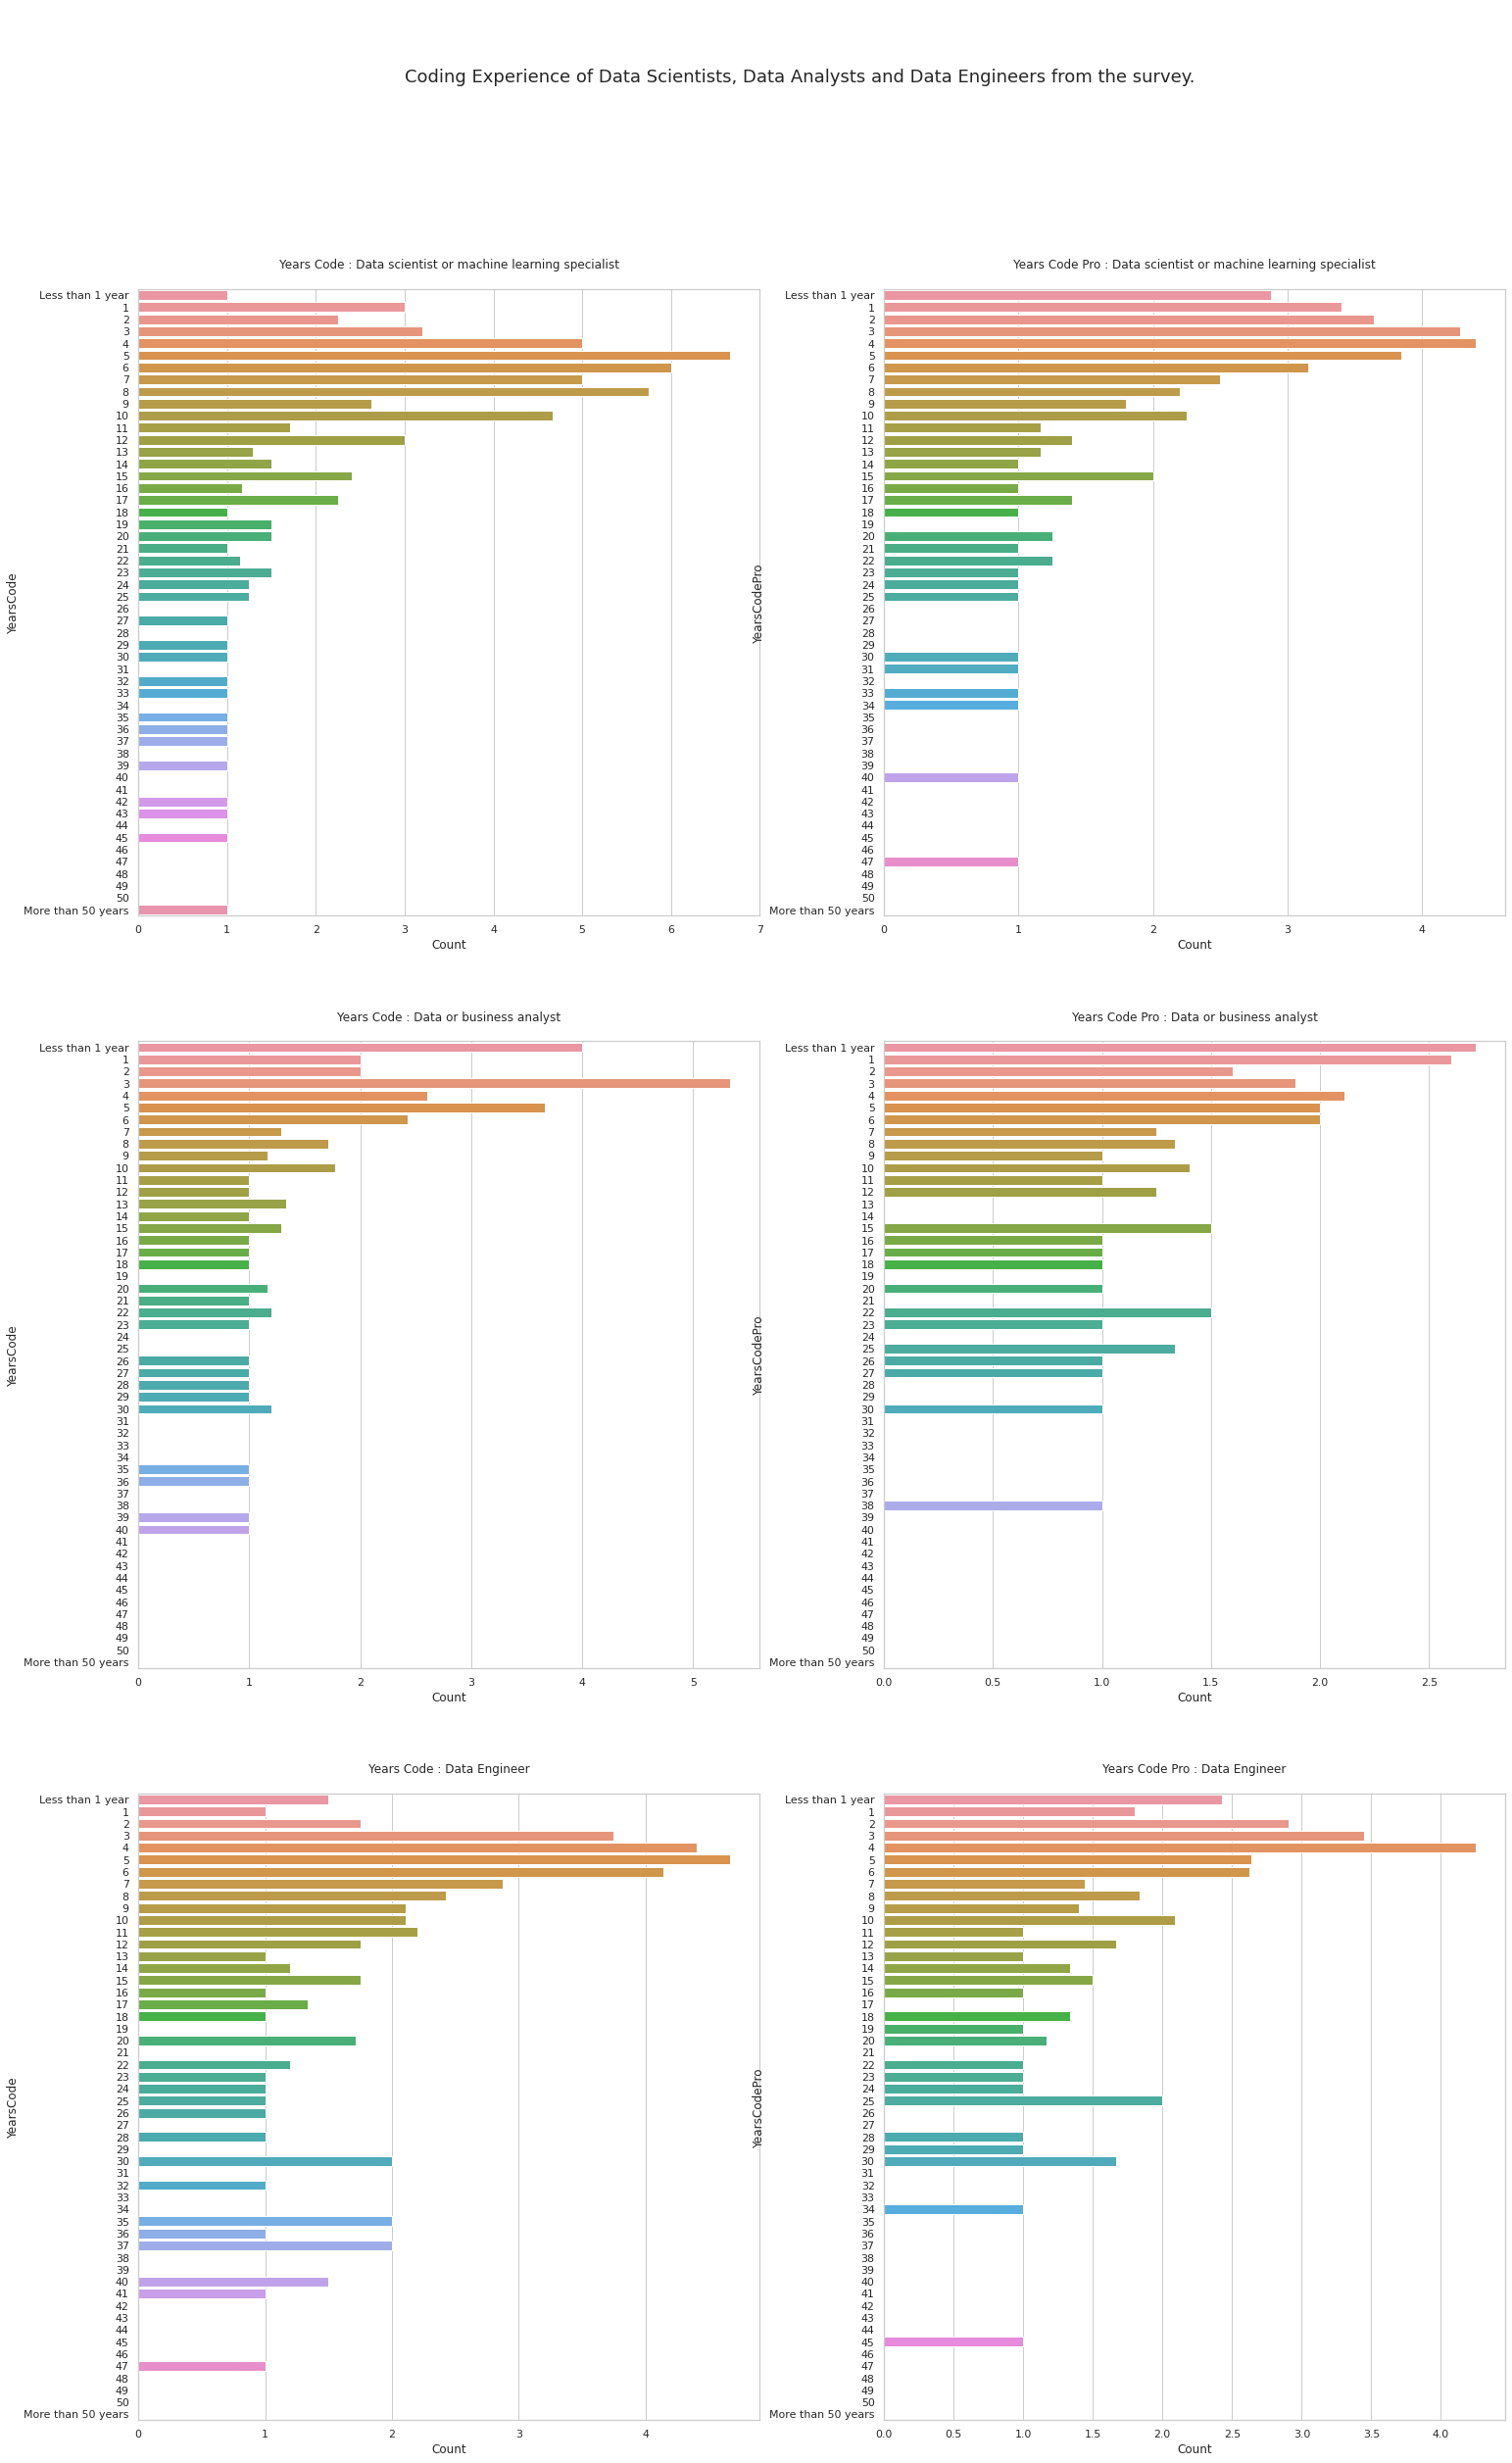

In [104]:
fig = plt.figure(figsize=(25, 40))
spec = fig.add_gridspec(ncols=2, nrows=3)
sns.set(style="whitegrid")

#Years code  and Years code pro for DataScience
ax00 = fig.add_subplot(spec[0, 0])
ax00.set_title('Years Code : Data scientist or machine learning specialist\n')
sns.barplot(data = data_exp.loc[(data_exp.DevType == "Data scientist or machine learning specialist")], x="Count", y="YearsCode", order = yearsCode_order, ci = None, ax = ax00)


ax01 = fig.add_subplot(spec[0, 1])
ax01.set_title('Years Code Pro : Data scientist or machine learning specialist\n')
sns.barplot(data = data_exp.loc[(data_exp.DevType == "Data scientist or machine learning specialist")], x="Count", y="YearsCodePro", order = yearsCodePro_order,ci = None, ax = ax01)

#Years code  and Years code pro for DataAnalyst
ax10 = fig.add_subplot(spec[1, 0])
ax10.set_title('Years Code : Data or business analyst\n')
sns.barplot(data = data_exp.loc[(data_exp.DevType == "Data or business analyst")], x="Count", y="YearsCode",order = yearsCode_order,ci = None, ax = ax10)

ax11 = fig.add_subplot(spec[1, 1])
ax11.set_title('Years Code Pro : Data or business analyst\n')
sns.barplot(data = data_exp.loc[(data_exp.DevType == "Data or business analyst")], x="Count", y="YearsCodePro", order = yearsCodePro_order,ci = None, ax = ax11)

#Years code  and Years code pro for Engineer, data

ax20 = fig.add_subplot(spec[2, 0])
ax20.set_title('Years Code : Data Engineer\n')
sns.barplot(data = data_exp.loc[(data_exp.DevType == "Engineer, data")], x="Count", y="YearsCode",order = yearsCode_order,ci = None, ax = ax20)

ax21 = fig.add_subplot(spec[2, 1])
ax21.set_title('Years Code Pro : Data Engineer\n')
sns.barplot(data = data_exp.loc[(data_exp.DevType == "Engineer, data")], x="Count", y="YearsCodePro", order = yearsCodePro_order,ci = None, ax = ax21)

fig.suptitle('\n\n\nCoding Experience of Data Scientists, Data Analysts and Data Engineers from the survey.', fontsize = 18)

# Salary

## Raw Numbers

Text(0.5, 0.98, '\n\nConverted Annual Salary of Data Scientists, Data Analysts and Data Engineers from the survey.')

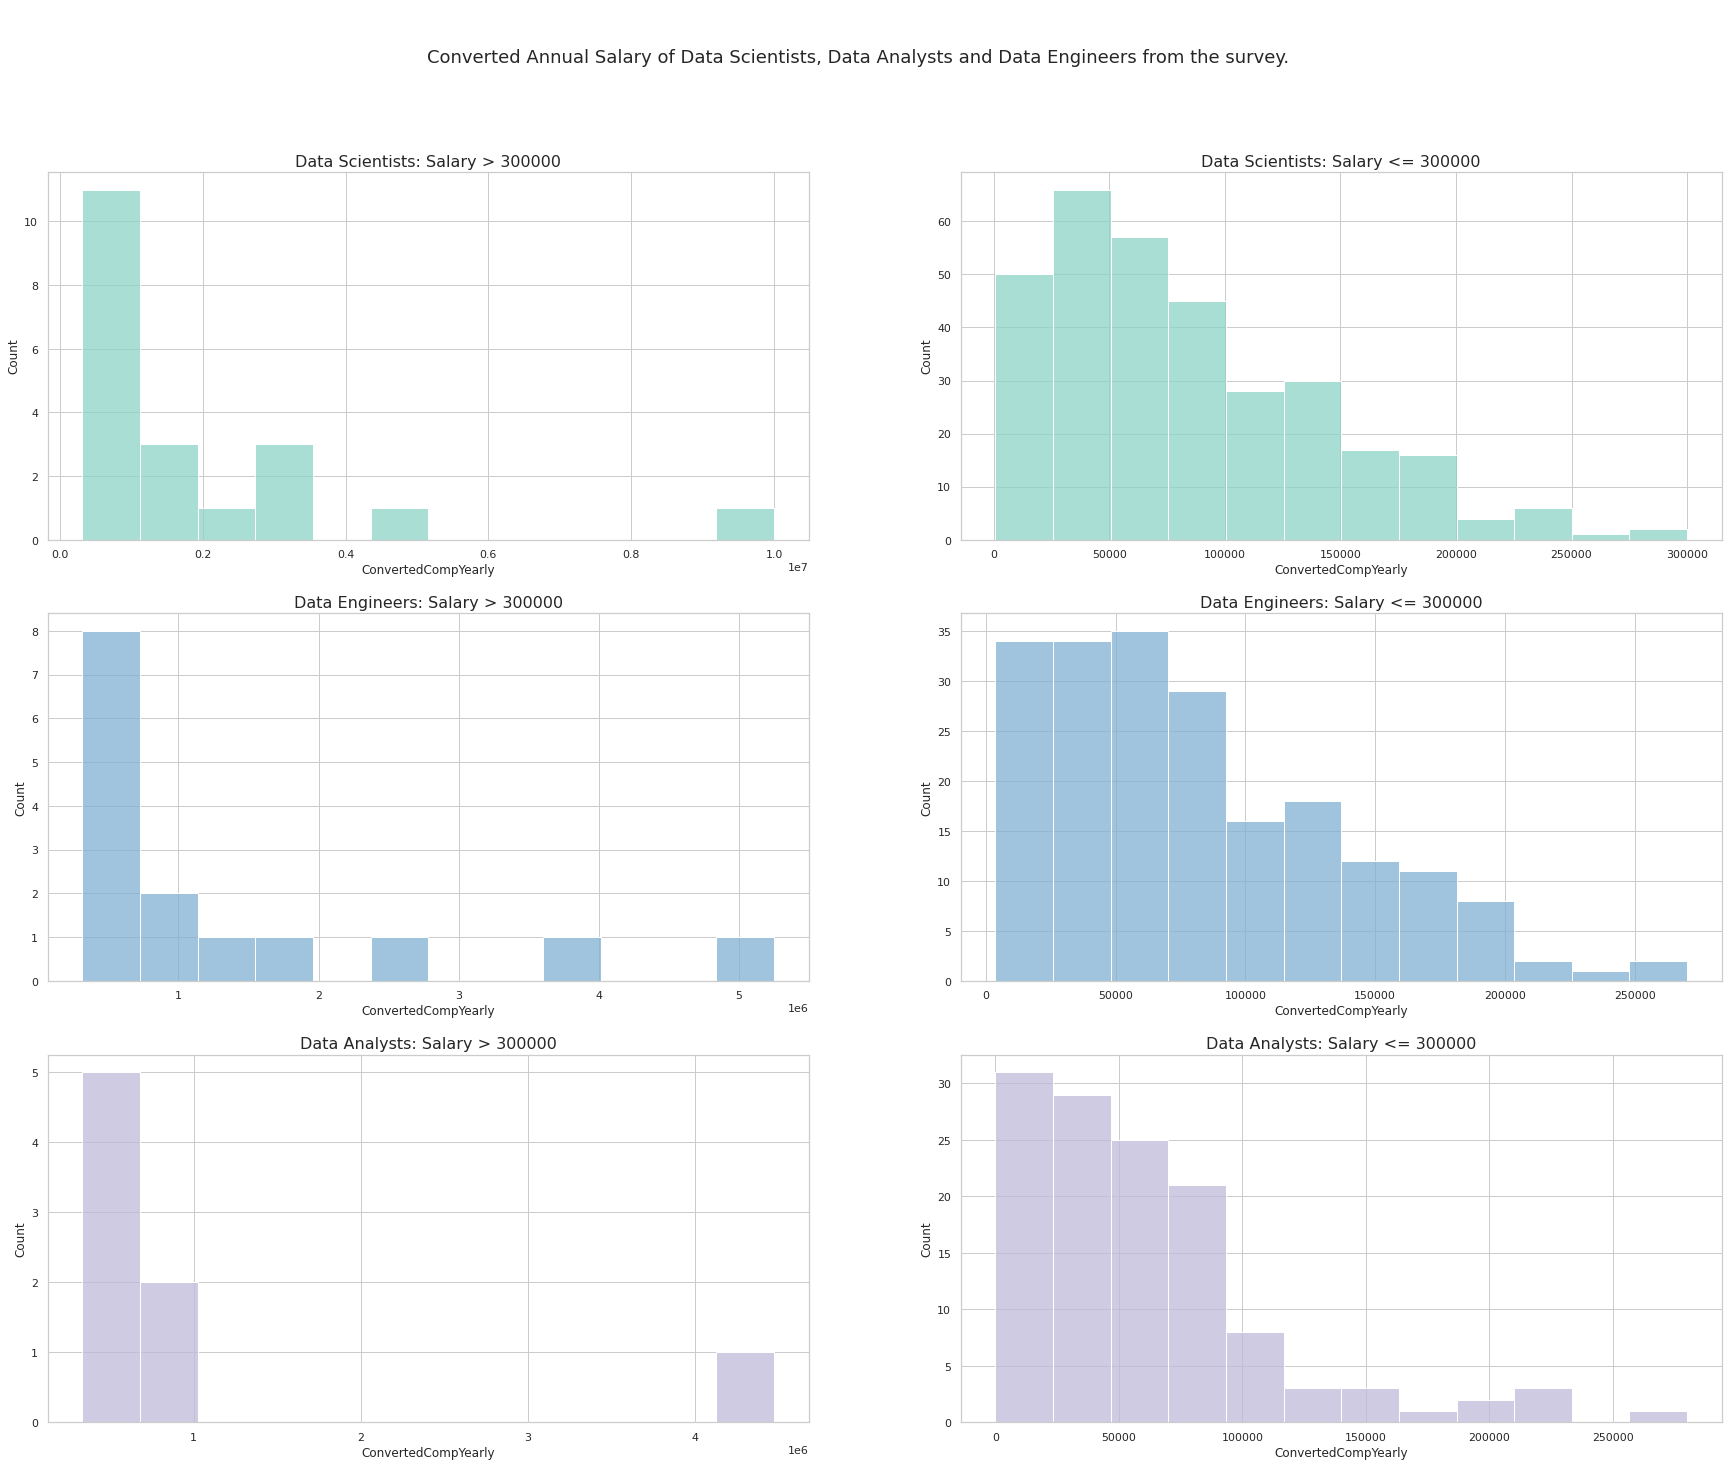

In [105]:
#300000 as the cutoff number

value_1 = 300000

fig = plt.figure(figsize=(30, 23))#(30, 28)
spec = fig.add_gridspec(ncols=2, nrows=3)
ax01 = fig.add_subplot(spec[0, 0])
ax01.set_title('Data Scientists: Salary > ' + str(value_1),fontsize = 16)
#sns.barplot(data = dataScience_mask1, y = "sal_group", x = "ResponseId", color = palette_1[2] )
sns.histplot(data = dataScience_mask.loc[(dataScience_mask.ConvertedCompYearly > value_1),"ConvertedCompYearly" ], bins = 12,color = palette_1[0], ax = ax01 )
ax02 = fig.add_subplot(spec[0, 1])
ax02.set_title('Data Scientists: Salary <= ' + str(value_1), fontsize = 16)
sns.histplot(data = dataScience_mask.loc[(dataScience_mask.ConvertedCompYearly <= value_1),"ConvertedCompYearly" ], bins = 12, color = palette_1[0], ax = ax02 )


ax03 = fig.add_subplot(spec[2, 0])
ax03.set_title('\n\nData Analysts: Salary > ' + str(value_1), fontsize = 16)
sns.histplot(data = dataAnalyst_mask.loc[(dataAnalyst_mask.ConvertedCompYearly > value_1),"ConvertedCompYearly" ], bins = 12,color = palette_1[2], ax = ax03 )
ax04 = fig.add_subplot(spec[2, 1])
ax04.set_title('\n\nData Analysts: Salary <= ' + str(value_1), fontsize = 16)
sns.histplot(data = dataAnalyst_mask.loc[(dataAnalyst_mask.ConvertedCompYearly <= value_1),"ConvertedCompYearly" ], bins = 12,color = palette_1[2], ax = ax04 )


ax05 = fig.add_subplot(spec[1, 0])
ax05.set_title('\n\nData Engineers: Salary > ' + str(value_1), fontsize = 16)
sns.histplot(data = dataEngineer_mask.loc[(dataEngineer_mask.ConvertedCompYearly > value_1),"ConvertedCompYearly" ], bins = 12,color = palette_1[4], ax = ax05 )
ax06 = fig.add_subplot(spec[1, 1])
ax06.set_title('\n\nData Engineers: Salary <= ' + str(value_1) , fontsize = 16)
sns.histplot(data = dataEngineer_mask.loc[(dataEngineer_mask.ConvertedCompYearly <= value_1),"ConvertedCompYearly" ], bins = 12, color = palette_1[4], ax = ax06 )

fig.suptitle('\n\nConverted Annual Salary of Data Scientists, Data Analysts and Data Engineers from the survey.', fontsize = 18)

Text(0.5, 0.98, 'Converted Annual Salary of Data Scientists, Data Analysts and Data Engineers from the survey.\n\n\n')

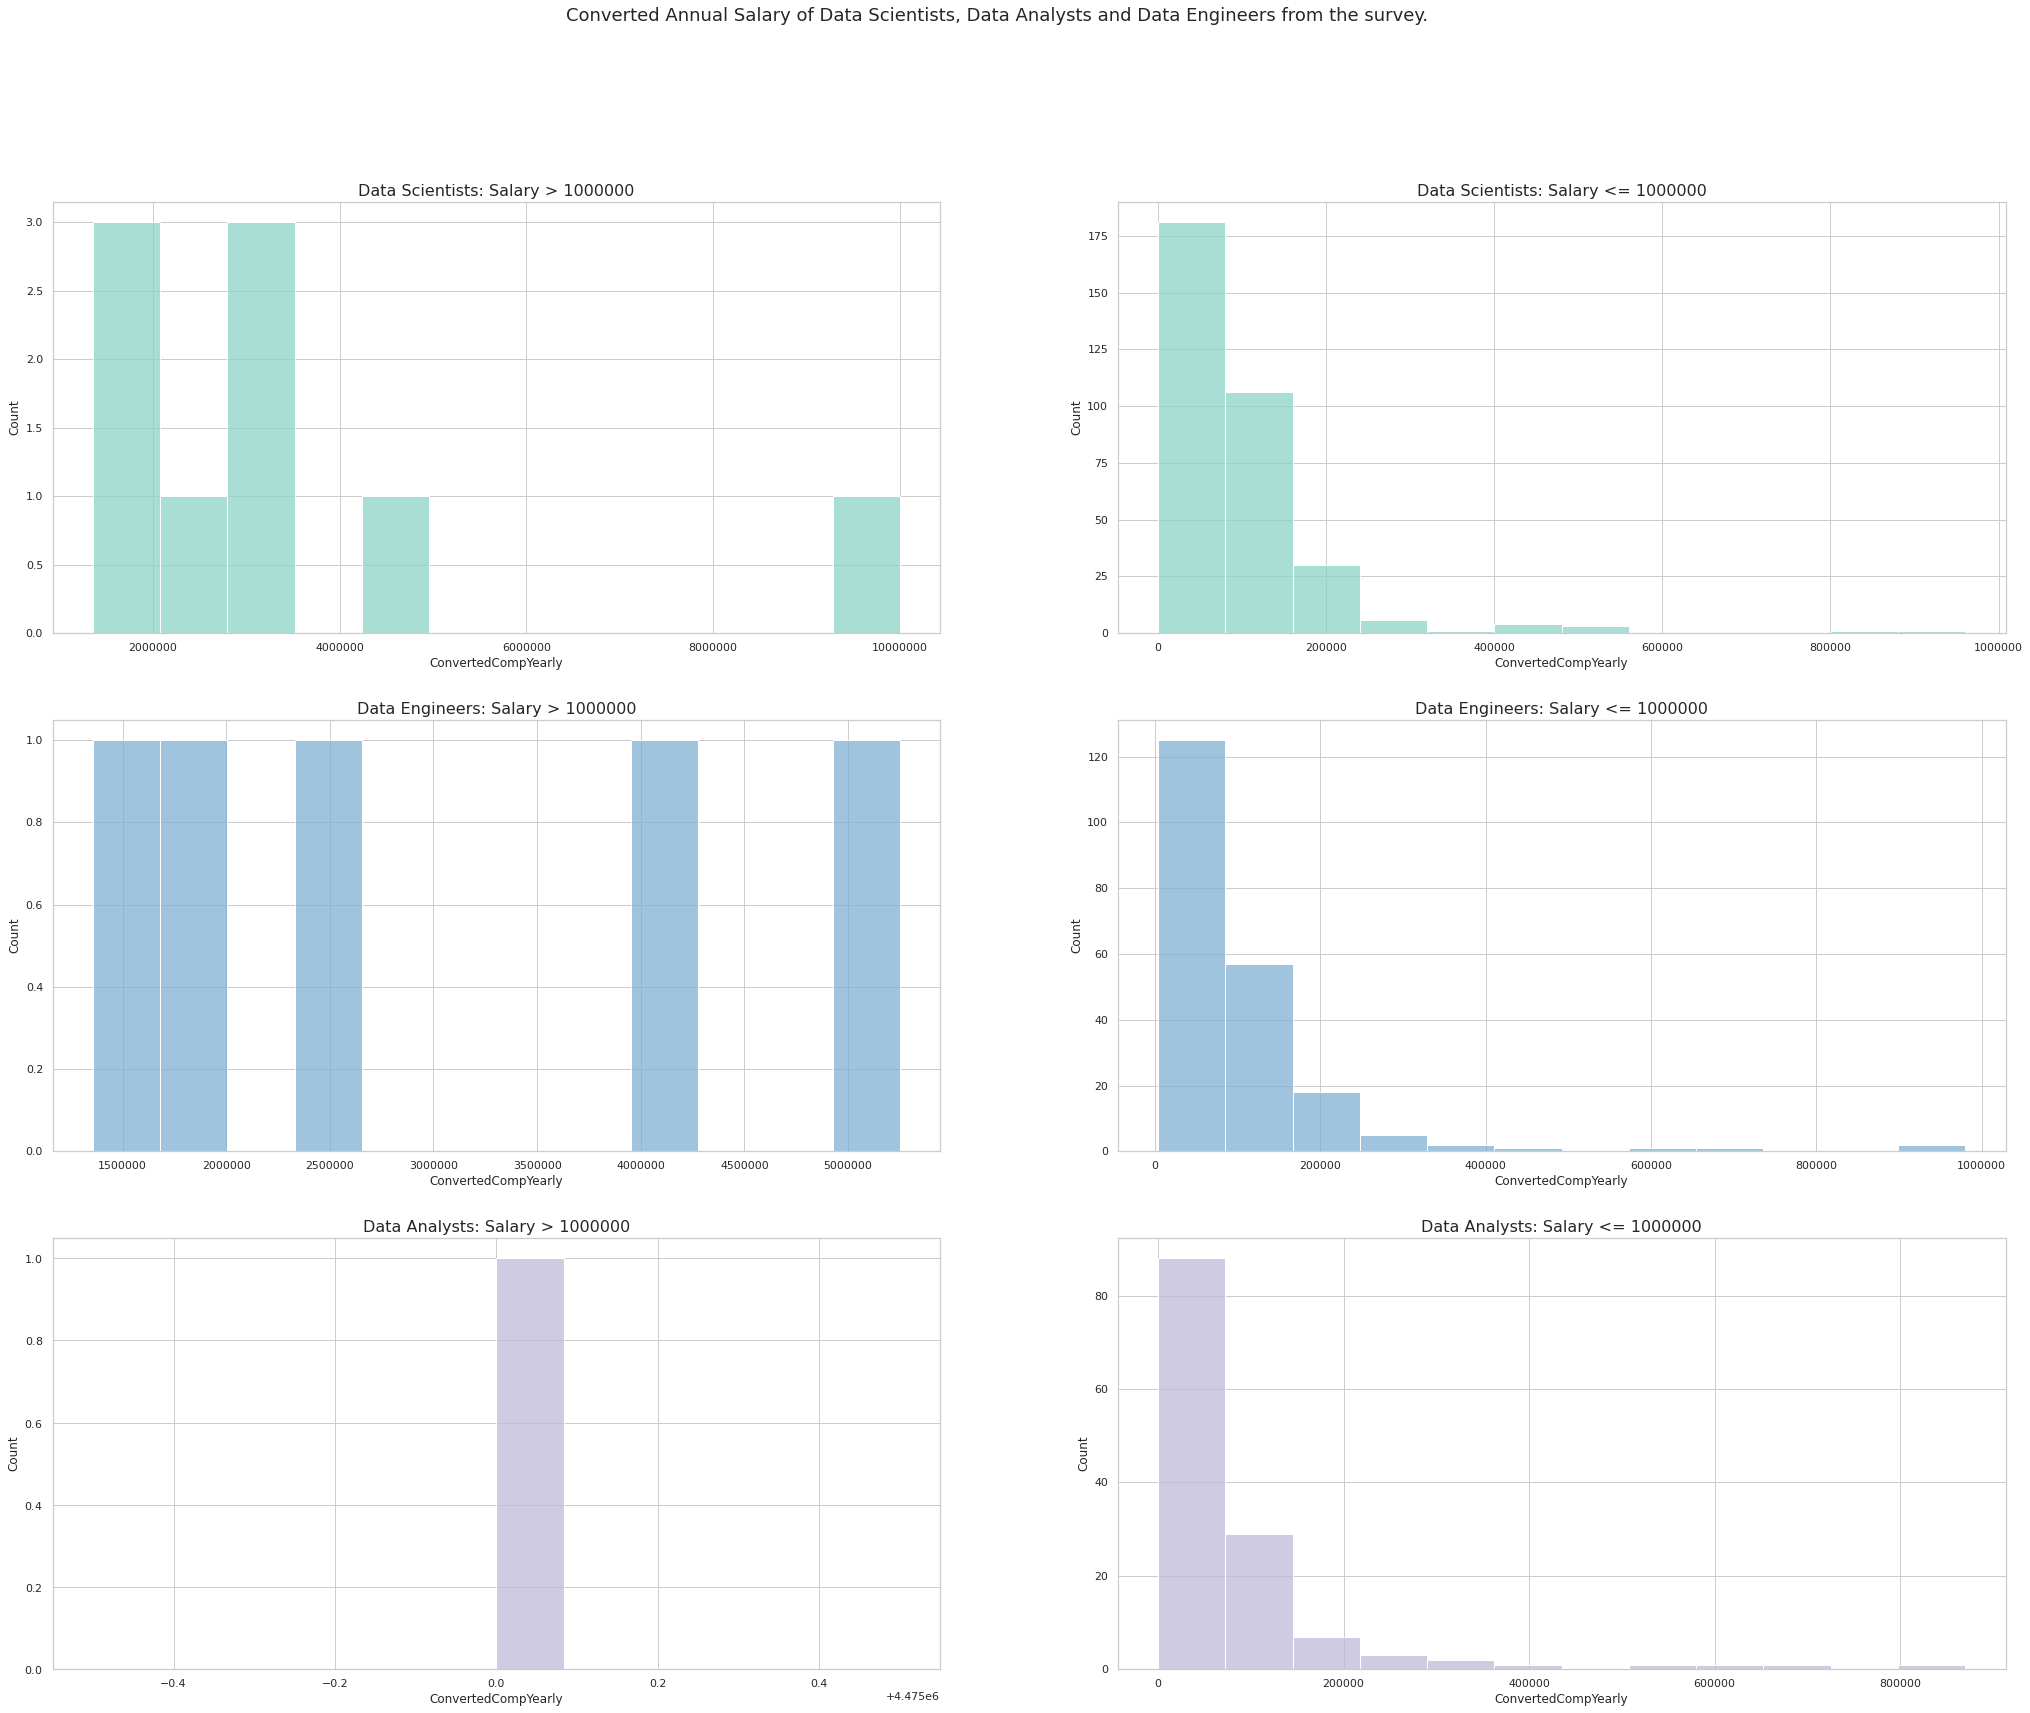

In [106]:
#1000000 as the cutoff number
value_1 = 1000000

fig = plt.figure(figsize=(35, 27))#(30, 28)
spec = fig.add_gridspec(ncols=2, nrows=3)

ax01 = fig.add_subplot(spec[0, 0])
ax01.set_title('\n\nData Scientists: Salary > ' + str(value_1),fontsize = 16)
#sns.barplot(data = dataScience_mask1, y = "sal_group", x = "ResponseId", color = palette_1[2] )
sns.histplot(data = dataScience_mask.loc[(dataScience_mask.ConvertedCompYearly > value_1),"ConvertedCompYearly" ], bins = 12,color = palette_1[0], ax = ax01 )
ax01.ticklabel_format(style='plain', axis='x')

ax02 = fig.add_subplot(spec[0, 1])
ax02.set_title('\n\nData Scientists: Salary <= ' + str(value_1), fontsize = 16)
sns.histplot(data = dataScience_mask.loc[(dataScience_mask.ConvertedCompYearly <= value_1),"ConvertedCompYearly" ], bins = 12, color = palette_1[0], ax = ax02 )
ax02.ticklabel_format(style='plain', axis='x')

ax03 = fig.add_subplot(spec[2, 0])
ax03.ticklabel_format( axis='y', useMathText=True) #
ax03.set_title('Data Analysts: Salary > ' + str(value_1), fontsize = 16)
sns.histplot(data = dataAnalyst_mask.loc[(dataAnalyst_mask.ConvertedCompYearly > value_1),"ConvertedCompYearly" ], bins = 12,color = palette_1[2], ax = ax03 )


ax04 = fig.add_subplot(spec[2, 1])
ax04.set_title('Data Analysts: Salary <= ' + str(value_1), fontsize = 16)
sns.histplot(data = dataAnalyst_mask.loc[(dataAnalyst_mask.ConvertedCompYearly <= value_1),"ConvertedCompYearly" ], bins = 12,color = palette_1[2], ax = ax04 )
ax04.ticklabel_format(style='plain', axis='x')

ax05 = fig.add_subplot(spec[1, 0])
ax05.set_title('Data Engineers: Salary > ' + str(value_1), fontsize = 16)
sns.histplot(data = dataEngineer_mask.loc[(dataEngineer_mask.ConvertedCompYearly > value_1),"ConvertedCompYearly" ], bins = 12,color = palette_1[4], ax = ax05 )
ax05.ticklabel_format(style='plain', axis='x')

ax06 = fig.add_subplot(spec[1, 1])
ax06.set_title('Data Engineers: Salary <= ' + str(value_1) , fontsize = 16)
sns.histplot(data = dataEngineer_mask.loc[(dataEngineer_mask.ConvertedCompYearly <= value_1),"ConvertedCompYearly" ], bins = 12, color = palette_1[4], ax = ax06 )
ax06.ticklabel_format(style='plain', axis='x')

fig.suptitle('Converted Annual Salary of Data Scientists, Data Analysts and Data Engineers from the survey.\n\n\n', fontsize = 18)

# Employment - Full Time Part Time Student etc

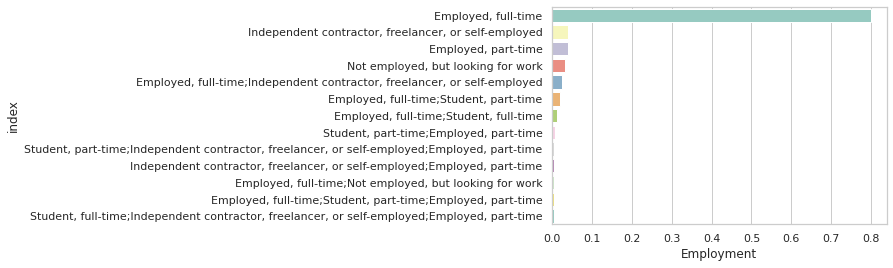

In [107]:
#Data Analyst Employment
type(dataAnalyst_mask.Employment.value_counts())
data_Analyst_employment = dataAnalyst_mask.Employment.value_counts(normalize=True).reset_index()
sns.barplot(data = data_Analyst_employment, x = "Employment", y = "index", palette=palette_1)


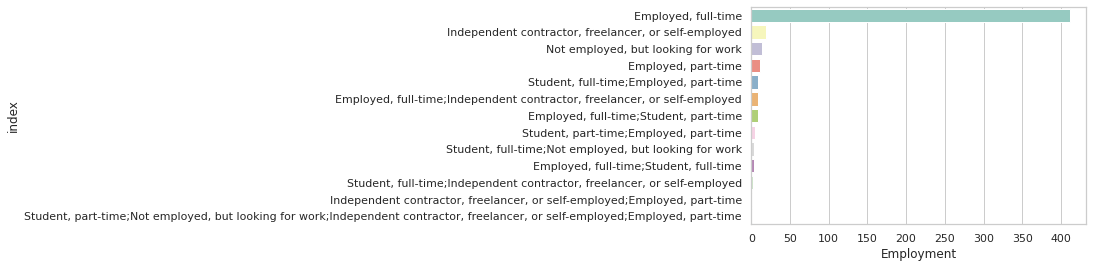

In [108]:
#Data Scientist Emplotment
data_Science_employment = dataScience_mask.Employment.value_counts().reset_index()
sns.barplot(data = data_Science_employment, x = "Employment", y = "index", palette=palette_1)

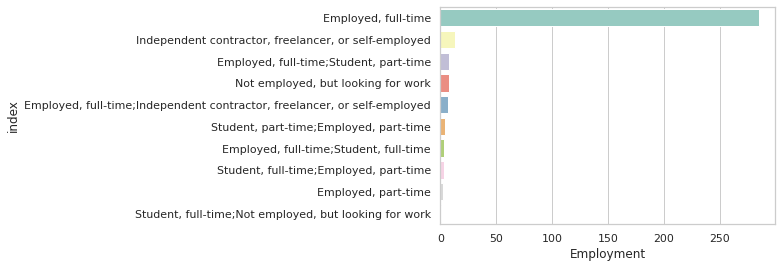

In [109]:
#Data engineer employment
data_Engineer_employment = dataEngineer_mask.Employment.value_counts().reset_index()
sns.barplot(data = data_Engineer_employment, x = "Employment", y = "index", palette=palette_1)

# Sexuality/Gender

Demographics

'Age', : Age range

'Gender', : Which of the following describe you, if any? Please check all that apply.

'Trans', : Do you identify as transgender?

'Sexuality', : Which of the following describe you, if any? Please check all that apply.

'Ethnicity', : Which of the following describe you, if any? Please check all that apply.

'Accessibility', : Which of the following describe you, if any? Please check all that apply.

'MentalHealth', : Which of the following describe you, if any? Please check all that apply.

### Gender

In [110]:
#Gender
df_modified.Gender.value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

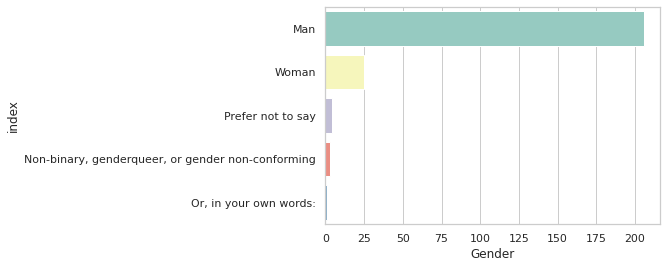

In [111]:
data_Analyst_gender = dataAnalyst_mask.Gender.value_counts().reset_index()
sns.barplot(data = data_Analyst_gender, x = "Gender", y = "index", palette=palette_1)

In [112]:
#data_Science_gender

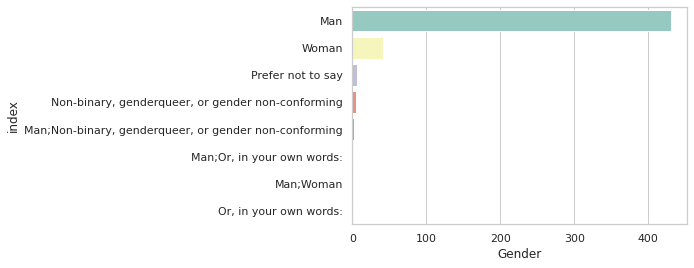

In [113]:
data_Science_gender = dataScience_mask.Gender.value_counts().reset_index()
sns.barplot(data = data_Science_gender, x = "Gender", y = "index", palette=palette_1)

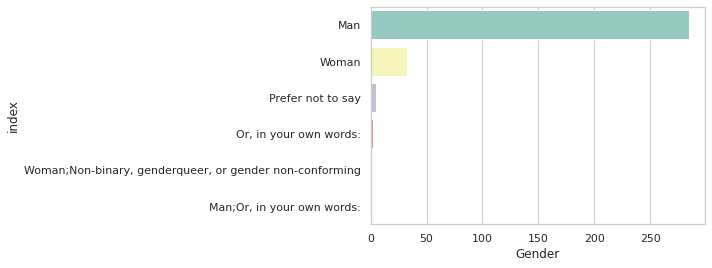

In [114]:
data_Engineer_gender = dataEngineer_mask.Gender.value_counts().reset_index()
sns.barplot(data = data_Engineer_gender, x = "Gender", y = "index", palette=palette_1)

In [115]:
# all data roles All genders
all_data = df_modified.loc[
    (
    (df_modified.DataEngineer == True) | 
    (df_modified.DataScience == True) |
    (df_modified.DataAnalyst == True)
    ) ]
    #Dropping the language filter
    #&
    #(df_modified.SQL == True)&
    #(df_modified.Python == True)]
all_data_genders = all_data.Gender.value_counts(normalize=True).reset_index()

all_data_genders.Gender = (all_data_genders.Gender*100).round(2)
all_data_genders

,index,Gender
0,Man,87.39
1,Woman,9.48
2,Prefer not to say,1.42
3,"Non-binary, genderqueer, or gender non-conforming",0.76
4,"Or, in your own words:",0.38
5,"Man;Non-binary, genderqueer, or gender non-conforming",0.19
6,"Man;Or, in your own words:",0.19
7,Man;Woman,0.09
8,"Woman;Non-binary, genderqueer, or gender non-conforming",0.09


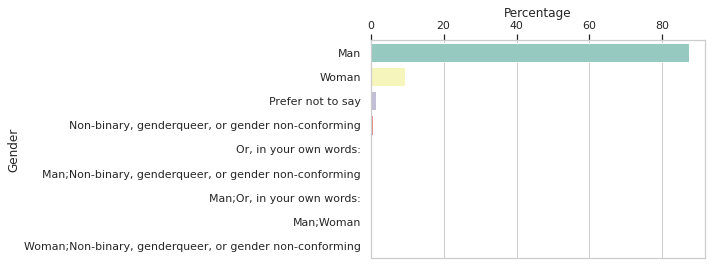

In [116]:
ax = sns.barplot(data = all_data_genders, x = "Gender", y = "index", palette=palette_1[0:])
ax.set( ylabel = "Gender", xlabel = "Percentage")
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

[Text(0, 0.5, 'Gender'), Text(0.5, 0, 'Percentage')]

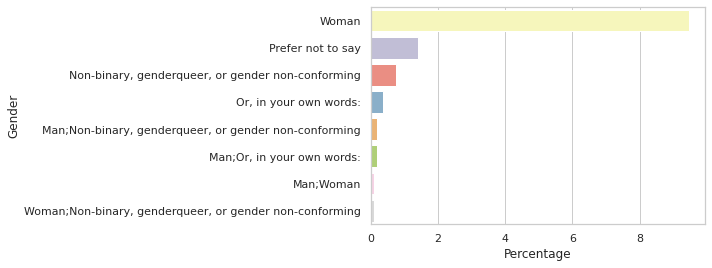

In [117]:
# all data roles genders other than Man
ax = sns.barplot(data = all_data_genders[1:], x = "Gender", y = "index", palette=palette_1[1:])
ax.set( ylabel = "Gender", xlabel = "Percentage")

### Trans

In [118]:
#Trans

df_modified.Trans.value_counts()

No                        67392
Prefer not to say          1379
Yes                        1064
Or, in your own words:      480
Name: Trans, dtype: int64

In [119]:
data_Analyst_Trans = dataAnalyst_mask.Trans.value_counts().reset_index()
data_Analyst_Trans

,index,Trans
0,No,228
1,Prefer not to say,5
2,Yes,2
3,"Or, in your own words:",1


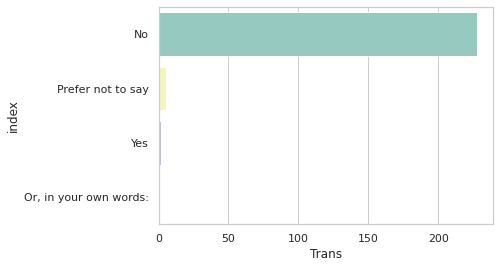

In [120]:
sns.barplot(data = data_Analyst_Trans, x = "Trans", y = "index", palette=palette_1)

In [121]:
data_Science_Trans = dataScience_mask.Trans.value_counts().reset_index()
data_Science_Trans

,index,Trans
0,No,470
1,Prefer not to say,8
2,"Or, in your own words:",5
3,Yes,3


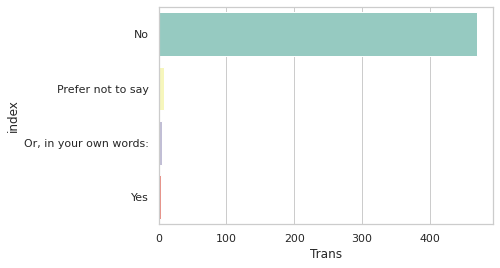

In [122]:
sns.barplot(data = data_Science_Trans, x = "Trans", y = "index", palette=palette_1)

In [123]:
data_Engineer_Trans = dataEngineer_mask.Trans.value_counts().reset_index()
data_Engineer_Trans

,index,Trans
0,No,318
1,Prefer not to say,5
2,"Or, in your own words:",3
3,Yes,1


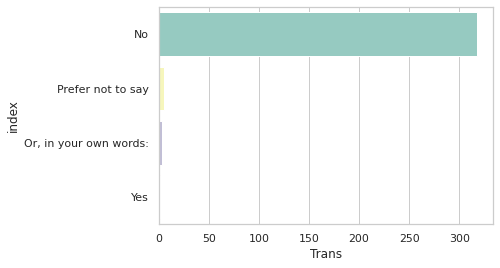

In [124]:
sns.barplot(data = data_Engineer_Trans, x = "Trans", y = "index", palette=palette_1)

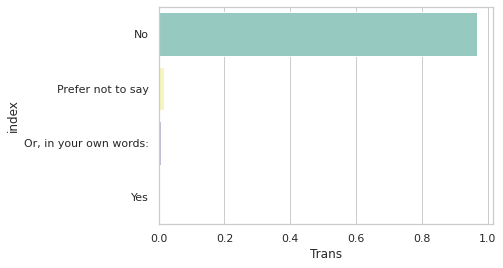

In [125]:
#All data All trans data
all_data_trans = all_data.Trans.value_counts(normalize=True).reset_index()
all_data_trans
sns.barplot(data = all_data_trans, x = "Trans", y = "index", palette=palette_1[0:])

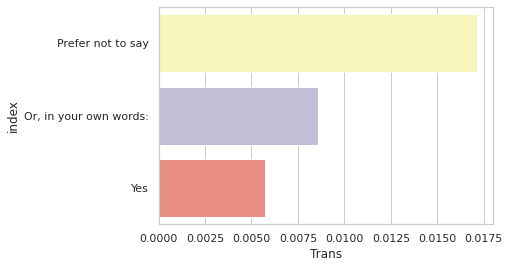

In [126]:
#All data excluding Trans = No
sns.barplot(data = all_data_trans[1:], x = "Trans", y = "index", palette=palette_1[1:])

### Sexuality

In [127]:
#Sexuality

df_modified.Sexuality.value_counts()

Straight / Heterosexual                                                           55238
Prefer not to say                                                                  4350
Bisexual                                                                           2700
Gay or Lesbian                                                                     1382
Prefer to self-describe:                                                           1079
Queer                                                                               394
Bisexual;Straight / Heterosexual                                                    354
Bisexual;Queer                                                                      282
Straight / Heterosexual;Prefer to self-describe:                                    169
Gay or Lesbian;Queer                                                                150
Straight / Heterosexual;Queer                                                        79
Bisexual;Gay or Lesbian         

In [128]:
data_Analyst_Sexuality = dataAnalyst_mask.Sexuality.value_counts().reset_index()
data_Analyst_Sexuality

,index,Sexuality
0,Straight / Heterosexual,196
1,Prefer not to say,13
2,Bisexual,6
3,Gay or Lesbian,6
4,Prefer to self-describe:,2
5,Prefer to self-describe:;Gay or Lesbian,1
6,Gay or Lesbian;Queer,1
7,Queer,1
8,Bisexual;Queer,1
9,Bisexual;Straight / Heterosexual,1


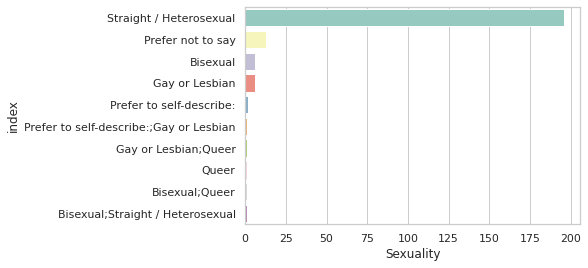

In [129]:
sns.barplot(data = data_Analyst_Sexuality, x = "Sexuality", y = "index", palette=palette_1)

In [130]:
data_Science_Sexuality = dataScience_mask.Sexuality.value_counts().reset_index()
data_Science_Sexuality

,index,Sexuality
0,Straight / Heterosexual,407
1,Prefer not to say,18
2,Bisexual,15
3,Gay or Lesbian,11
4,Queer,5
5,Prefer to self-describe:,2
6,Straight / Heterosexual;Queer,2
7,Straight / Heterosexual;Prefer to self-describe:,1
8,Bisexual;Queer,1


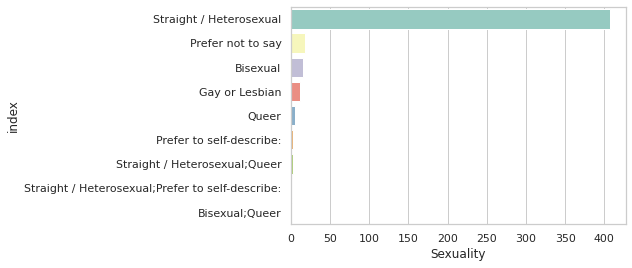

In [131]:
sns.barplot(data = data_Science_Sexuality, x = "Sexuality", y = "index", palette=palette_1)

In [132]:
data_Engineer_Sexuality = dataEngineer_mask.Sexuality.value_counts().reset_index()
data_Engineer_Sexuality

,index,Sexuality
0,Straight / Heterosexual,259
1,Prefer not to say,24
2,Bisexual,16
3,Gay or Lesbian,5
4,Bisexual;Straight / Heterosexual,2
5,Bisexual;Straight / Heterosexual;Gay or Lesbian;Queer,2
6,Prefer to self-describe:,2
7,Bisexual;Queer,2
8,Straight / Heterosexual;Prefer to self-describe:,1


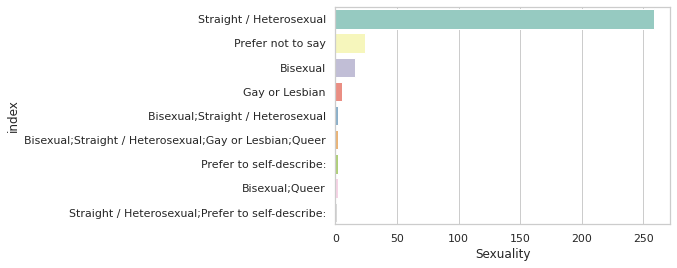

In [133]:
sns.barplot(data = data_Engineer_Sexuality, x = "Sexuality", y = "index", palette=palette_1)

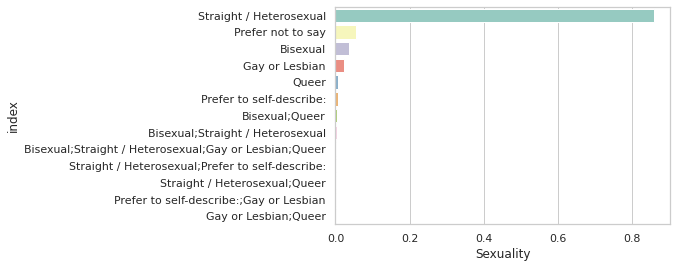

In [134]:
# All data all sexuality

all_data_sexuality = all_data.Sexuality.value_counts(normalize=True).reset_index()
all_data_sexuality
sns.barplot(data = all_data_sexuality, x = "Sexuality", y = "index", palette=palette_1[0:])

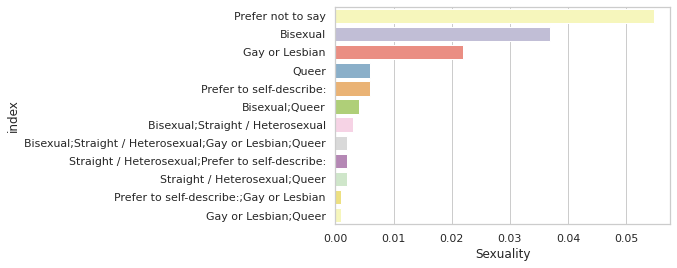

In [135]:
# All data all sexuality except straight/heterosexual
sns.barplot(data = all_data_sexuality[1:], x = "Sexuality", y = "index", palette=palette_1[1:])

# Things I did before I had a thought direction

In [136]:
survey_results.Accessibility.unique()
survey_results.Accessibility.value_counts()
survey_results['Accessibility'].value_counts()

None of the above                                                                                                                                                                                           63064
Prefer not to say                                                                                                                                                                                            1633
I am blind / have difficulty seeing                                                                                                                                                                           981
Or, in your own words:                                                                                                                                                                                        579
I am deaf / hard of hearing                                                                                                                                     

## Data Professionals percentages



```
dataAnalyst_mask = df_modified.loc[df_modified['DataAnalyst'] == True]
dataScience_mask = df_modified.loc[df_modified['DataScience'] == True]
dataEngineer_mask = df_modified.loc[df_modified['DataEngineer'] == True]
```



[244, 498, 334]

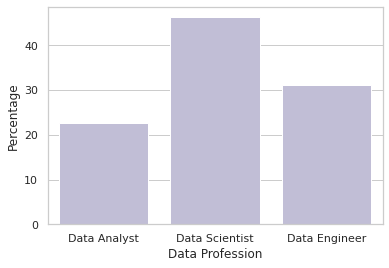

In [137]:
professions = ["Data Analyst","Data Scientist", "Data Engineer"]
total = df_modified['DataAnalyst'].sum() + df_modified['DataScience'].sum() + df_modified['DataEngineer'].sum()
counts = [df_modified['DataAnalyst'].sum() ,df_modified['DataScience'].sum(), df_modified['DataEngineer'].sum()]
percentages = [df_modified['DataAnalyst'].sum() * 100 /total,df_modified['DataScience'].sum()* 100/total,df_modified['DataEngineer'].sum()* 100/total]
ax = sns.barplot(x = professions , y = percentages, color = palette_1[2])
ax.set(xlabel='Data Profession', ylabel='Percentage')
counts


,professions,counts,percentages,languages
0,Data Analyst,244,22.676580,48.360656
1,Data Scientist,498,46.282528,52.008032
2,Data Engineer,334,31.040892,55.389222


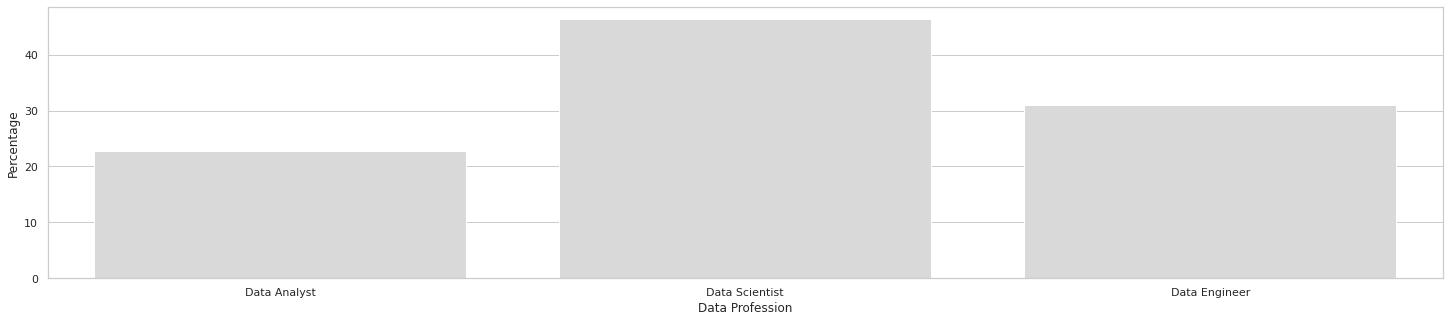

In [138]:
professions = ["Data Analyst","Data Scientist", "Data Engineer"]
total = df_modified['DataAnalyst'].sum() + df_modified['DataScience'].sum() + df_modified['DataEngineer'].sum()
counts = [df_modified['DataAnalyst'].sum() ,df_modified['DataScience'].sum(), df_modified['DataEngineer'].sum()]
percentages = [df_modified['DataAnalyst'].sum() * 100 /total,df_modified['DataScience'].sum()* 100/total,df_modified['DataEngineer'].sum()* 100/total]
sql_python = [df_modified.loc[(df_modified.DataAnalyst == True) & (df_modified.SQLandPython == True)].ResponseId.count() * 100 /df_modified['DataAnalyst'].sum(),
              df_modified.loc[(df_modified.DataScience == True) & (df_modified.SQLandPython == True)].ResponseId.count() * 100 /df_modified['DataScience'].sum(),
              df_modified.loc[(df_modified.DataEngineer == True) & (df_modified.SQLandPython == True)].ResponseId.count() * 100 /df_modified['DataEngineer'].sum()]
              
d = {
    'professions': professions,
    'counts': counts,
    'percentages': percentages,
    'languages': sql_python,
     }
amounts = pd.DataFrame(data=d)
fig = plt.figure(figsize=(25, 5))
ax = sns.barplot(data = amounts, x = "professions" , y = "percentages", color = palette_1[8])
ax.set(xlabel='Data Profession', ylabel='Percentage')
counts

amounts.head()

[Text(0, 0.5, 'Count'),
 [Text(0, 0, 'Data Analyst'),
  Text(0, 0, 'Data Scientist'),
  Text(0, 0, 'Data Engineer')],
 Text(0.5, 0, 'Data Profession'),
 Text(0.5, 1.0, 'Data Professions by Language Profficiency')]

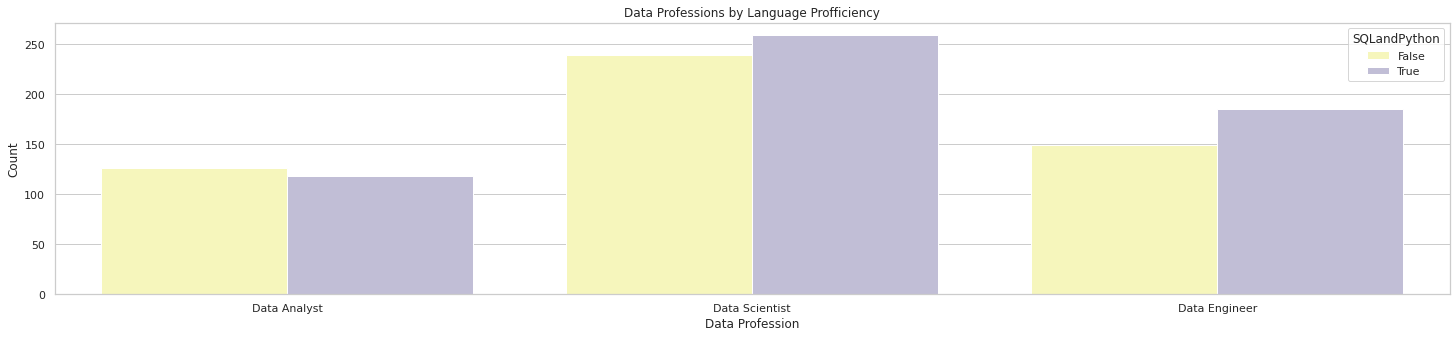

In [139]:
professions = ["Data Analyst","Data Scientist", "Data Engineer"]
data_df = df_modified.loc[(df_modified.DataAnalyst == True)|(df_modified.DataScience == True)|(df_modified.DataEngineer == True)]
fig = plt.figure(figsize=(25, 5))
ax = sns.countplot(data = data_df, x = "DevType", palette = palette_1[1:], hue = "SQLandPython", order = ["Data or business analyst","Data scientist or machine learning specialist","Engineer, data"] )
ax.set(xlabel='Data Profession', ylabel='Count', xticklabels = professions, title = "Data Professions by Language Profficiency")

[Text(0, 0.5, 'Percentage'),
 [Text(0, 0, 'Data Analyst'),
  Text(0, 0, 'Data Scientist'),
  Text(0, 0, 'Data Engineer')],
 Text(0.5, 0, 'Data Profession')]

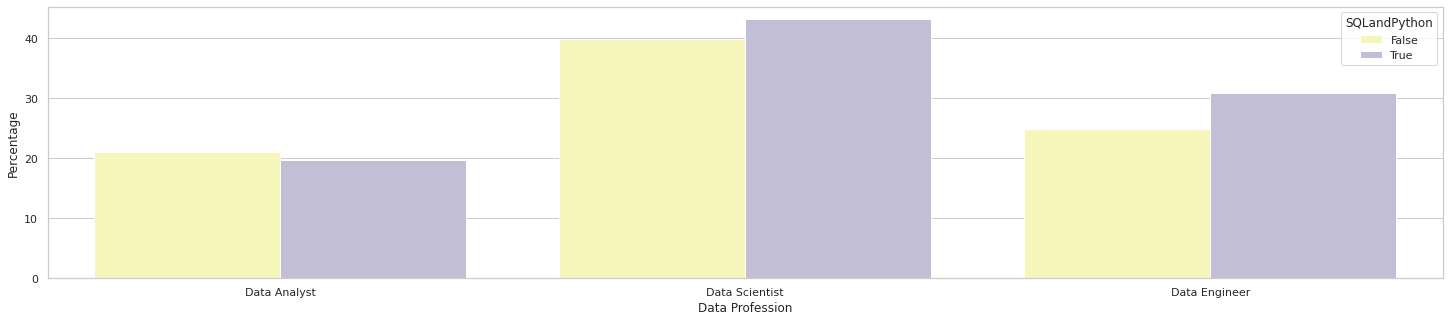

In [140]:
professions = ["Data Analyst","Data Scientist", "Data Engineer"]
data_df = df_modified.loc[(df_modified.DataAnalyst == True)|(df_modified.DataScience == True)|(df_modified.DataEngineer == True)]
fig = plt.figure(figsize=(25, 5))
#ax = sns.countplot(data = data_df, x = "DevType", palette = palette_1[1:], hue = "SQLandPython", order = ["Data or business analyst","Data scientist or machine learning specialist","Engineer, data"] )
#ax.set(xlabel='Data Profession', ylabel='Count', xticklabels = professions, title = "Data Professions by Language Profficiency")
language_data_01 = data_df.groupby(["DevType","SQLandPython"]).count().reset_index()
language_data_01.ResponseId = (language_data_01.ResponseId / (language_data_01.ResponseId.count())).round(2)
language_data_01
ax = sns.barplot(data = language_data_01, x = "DevType", y = "ResponseId", palette = palette_1[1:], hue = "SQLandPython", order = ["Data or business analyst","Data scientist or machine learning specialist","Engineer, data"] )
ax.set(xlabel='Data Profession', ylabel='Percentage', xticklabels = professions)#, title = "Data Professions by Language Profficiency")

In [141]:
data_df.loc[data_df.LanguageHaveWorkedWith.str.contains('R')== True].DevType.value_counts() #False    777 True     284

Data scientist or machine learning specialist    159
Data or business analyst                          75
Engineer, data                                    50
Name: DevType, dtype: int64

In [142]:
data_df.loc[data_df.LanguageHaveWorkedWith.str.contains('Python')== True].DevType.value_counts()

Data scientist or machine learning specialist    466
Engineer, data                                   266
Data or business analyst                         158
Name: DevType, dtype: int64

In [143]:
data_df.loc[data_df.LanguageHaveWorkedWith.str.contains('SQL')== True].DevType.value_counts()

Data scientist or machine learning specialist    273
Engineer, data                                   218
Data or business analyst                         167
Name: DevType, dtype: int64

In [144]:
data_df.LearnCode.value_counts()

School (i.e., University, College, etc)                                                                                                                                                                           73
Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                                                                       41
Books / Physical media;Other online resources (e.g., videos, blogs, forum);Online Courses or Certification                                                                                                        38
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);Online Courses or Certification                                                                38
Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);Online Courses or Certification                         